# Overview

In this notebook I am creating an image classifier for the Cifar10 dataset which has an accuracy, precision, and recall of 91%. The Cifar10 dataset consists of 60k 32x32 pixel photos, of which 50k in the training set and 10k were used in the test set. The images are of:

1. airplanes
2. automobiles
3. birds
4. cats
5. deer
6. dogs
7. frogs
8. horses
9. ships
10. trucks

I'm accomplishing this by using a convolutional neural network with a custom architecture. The choices made for the architecture are explored in the notebook "Cifar_10_Choosing_CNN_Architecture.ipynb". Then I take an ensemble of 15 of these convolutional neural networks.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
(X_train,y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# 0 = airplane
# 1 = automobile
# 2 = bird
# 3 = cat
# 4 = deer
# 5 = dog
# 6 = frog
# 7 = horse
# 8 = ship
# 9 = truck

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


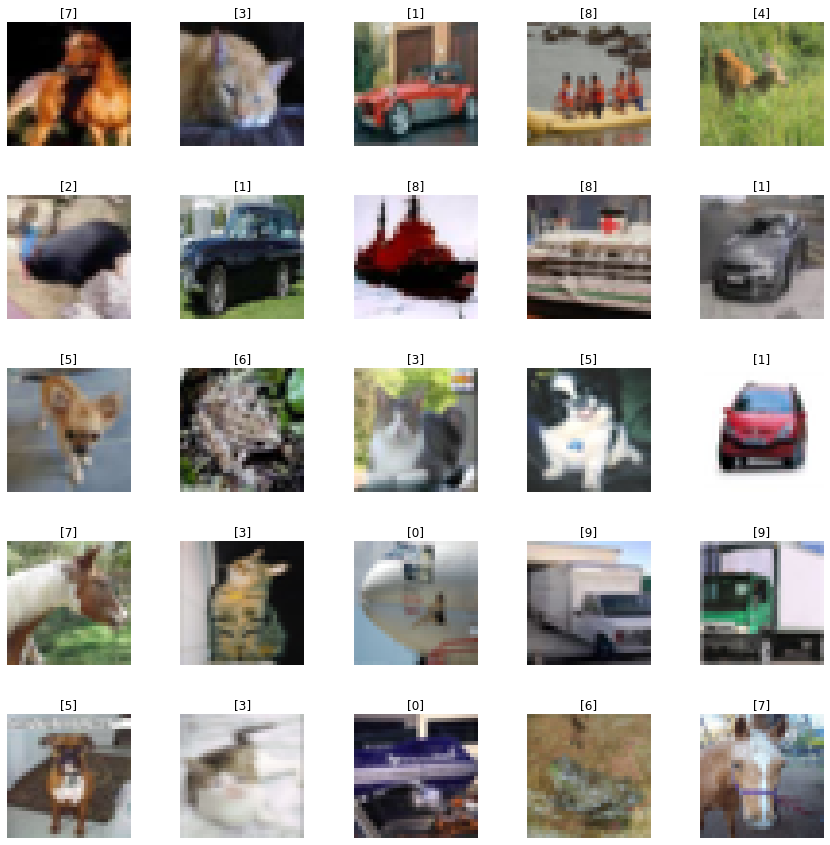

In [5]:
W_grid = 5
L_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15,15))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid ):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

In [6]:
# Prepare data for CNN
X_train = X_train/255.0
X_test = X_test/255.0 

y_train = tf.keras.utils.to_categorical( y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical( y_test, num_classes = 10)

In [7]:
from tensorflow.keras.callbacks import LearningRateScheduler

In [8]:
annealer = LearningRateScheduler( lambda x: 1e-3 * 0.95 ** x, verbose = 0 )
styles = [':', '-.', '--', '-', ':', '-.', '--', '-', ':', '-.', '--', '-']

In [9]:
from tensorflow.keras import models, layers
input_shape = X_train.shape[1:]

In [10]:
nets = 15
model = [0] * nets

for j in range(nets):
    model[j] = models.Sequential()
    model[j].add(layers.Conv2D(56,kernel_size=3, padding='same', activation='relu',input_shape=input_shape))
    model[j].add(layers.BatchNormalization())
    model[j].add(layers.Conv2D(56,kernel_size=3, padding='same', activation='relu'))
    model[j].add(layers.BatchNormalization())
    model[j].add(layers.Conv2D(56,kernel_size=3,strides=2,padding='same',activation='relu'))
    model[j].add(layers.BatchNormalization())
    model[j].add(layers.Dropout(0.28))

    model[j].add(layers.Conv2D(112,kernel_size=3, padding='same', activation='relu'))
    model[j].add(layers.BatchNormalization())
    model[j].add(layers.Conv2D(112,kernel_size=3, padding='same', activation='relu'))
    model[j].add(layers.BatchNormalization())
    model[j].add(layers.Conv2D(112,kernel_size=3,strides=2,padding='same',activation='relu'))
    model[j].add(layers.BatchNormalization())
    model[j].add(layers.Dropout(0.28))

    model[j].add(layers.Conv2D(224, padding='same', kernel_size=3,activation='relu'))
    model[j].add(layers.BatchNormalization())
    model[j].add(layers.Conv2D(224, padding='same', kernel_size=3,activation='relu'))
    model[j].add(layers.BatchNormalization())
    model[j].add(layers.Conv2D(224, padding='same', kernel_size=3,strides=2,activation='relu'))
    model[j].add(layers.BatchNormalization())
    model[j].add(layers.Dropout(0.28))

    model[j].add(layers.Flatten())
    model[j].add(layers.Dense(896, activation='relu'))
    model[j].add(layers.Dropout(0.28))
    model[j].add(layers.Dense(10, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
datagen = ImageDataGenerator(
        rotation_range=10,
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1)

In [13]:
hist = [0]*nets
epochs = 45

for j in range(nets):
    hist[j] = model[j].fit( datagen.flow(X_train, y_train, batch_size=64), 
                        epochs=epochs, steps_per_epoch = X_train.shape[0]//64, 
                        validation_data=(X_test,y_test), callbacks = [annealer], 
                        verbose = 0 )
    print( 'CNN {0}: Epochs = {1:d}, Train accuracy = {2:.5f}, Validation accuracy = {3:.5f}'.format(
    j, epochs, max(hist[j].history['accuracy']), max(hist[j].history['val_accuracy']) ))

CNN 0: Epochs = 45, Train accuracy = 0.97216, Validation accuracy = 0.89730
CNN 1: Epochs = 45, Train accuracy = 0.96992, Validation accuracy = 0.89060
CNN 2: Epochs = 45, Train accuracy = 0.97142, Validation accuracy = 0.89200
CNN 3: Epochs = 45, Train accuracy = 0.96958, Validation accuracy = 0.89240
CNN 4: Epochs = 45, Train accuracy = 0.96856, Validation accuracy = 0.89620
CNN 5: Epochs = 45, Train accuracy = 0.96950, Validation accuracy = 0.89490
CNN 6: Epochs = 45, Train accuracy = 0.97046, Validation accuracy = 0.89250
CNN 7: Epochs = 45, Train accuracy = 0.97144, Validation accuracy = 0.89650
CNN 8: Epochs = 45, Train accuracy = 0.96856, Validation accuracy = 0.89170
CNN 9: Epochs = 45, Train accuracy = 0.96782, Validation accuracy = 0.89470
CNN 10: Epochs = 45, Train accuracy = 0.97022, Validation accuracy = 0.89780
CNN 11: Epochs = 45, Train accuracy = 0.96988, Validation accuracy = 0.89110
CNN 12: Epochs = 45, Train accuracy = 0.97048, Validation accuracy = 0.89470
CNN 13: E

In [14]:
results = np.zeros( (X_test.shape[0],10))
for j in range(nets):
    results = results + model[j].predict(X_test)
results = np.argmax(results,axis=1)
results = pd.Series(results, name = 'label)')

In [15]:
y_test = np.argmax(y_test, axis=1)

In [16]:
missed_label = y_test[ y_test != results ]
missed_predict = list(results[ results != y_test ])
X_missed = X_test[ y_test != results ]

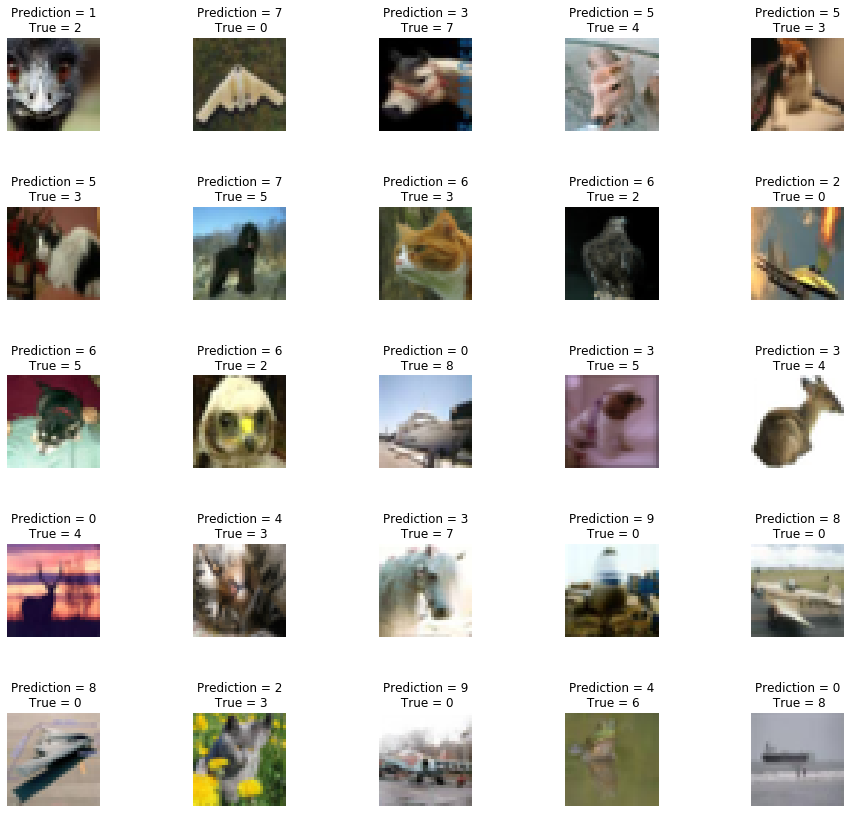

In [17]:
L = 5
W = 5
fig, axes = plt.subplots(L,W, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_missed[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format( 
        missed_predict[i], missed_label[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=1)

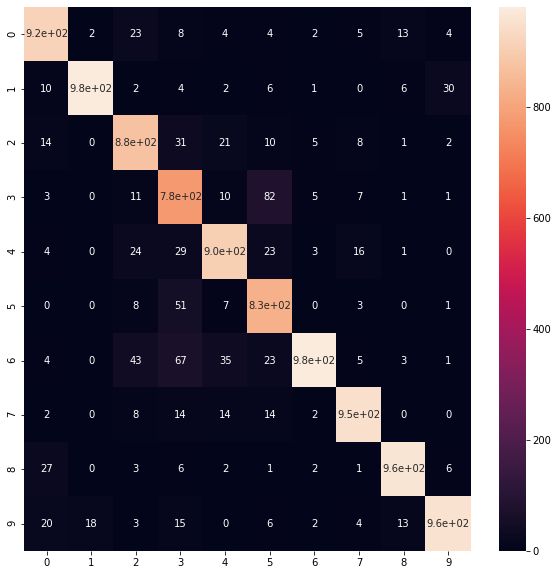

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix( results, y_test)
plt.figure( figsize = (10,10))
sns.heatmap( conf_mat, annot=True)

In [19]:
from sklearn.metrics import classification_report

print( classification_report(results, y_test))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       981
           1       0.98      0.94      0.96      1041
           2       0.88      0.90      0.89       967
           3       0.78      0.87      0.82       895
           4       0.91      0.90      0.90      1005
           5       0.83      0.92      0.87       901
           6       0.98      0.84      0.91      1159
           7       0.95      0.95      0.95      1005
           8       0.96      0.95      0.96      1010
           9       0.95      0.92      0.94      1036

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000

